In [1]:
# import os
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
from binance import Client

In [2]:
client = Client()
dict_symbols_price = client.get_all_tickers()
df_symbols_price = pd.DataFrame(dict_symbols_price)
list_symbols_binance = df_symbols_price['symbol'].to_list()

In [3]:
def get_historical_klines_1d(symbol):
	try:
		df = pd.DataFrame(client.get_historical_klines(symbol, '1d', '3 years ago UTC'))
	except ValueError as e:
		print('Not symbol {}'.format(symbol))
		print(e)
		return pd.DataFrame()
	if df.empty:
		return df
	df = df[[0,4]]
	df.columns = ['Timestamp', symbol]
	df = df.set_index('Timestamp')
	df = df.astype(float)
	return df

In [4]:
path_file_symbols = 'list_binance_cripto_symbol.csv'
df_list_symbols = pd.read_csv(path_file_symbols, sep=';')
symbols = df_list_symbols['symbol'].to_list()

In [5]:
prices = []

for symbol in symbols:
	if symbol in list_symbols_binance:
		prices.append(get_historical_klines_1d(symbol))
	else:
		print(symbol)

In [6]:
df = pd.concat(prices, sort=True, axis=1)

In [7]:
files_name = 'all_cripto.csv'

In [4]:
# df = pd.read_csv(files_name, sep=';', decimal=',')

In [8]:
df.to_csv(files_name, sep=';', decimal=',')

In [11]:
datetime.fromtimestamp(int(df.index.max()/1000))

datetime.datetime(2022, 3, 7, 3, 0)

In [31]:
start_date_ms = int(round(datetime(2019, 2, 1).timestamp() * 1000))
end_date_ms = int(round(datetime(2022, 3, 5).timestamp() * 1000))

In [52]:
df_time = df.loc[start_date_ms:]

In [32]:
# df_time = df.loc[start_date_ms:end_date_ms]

In [ ]:
df2 = df_time.iloc[-1]
df_symbol_nan = df2[df2.isnull()==True]
list_symbol_nan = df_symbol_nan.reset_index()['index'].to_list()
df_time = df_time[df_time.columns.difference(list_symbol_nan)]

In [18]:
from pypfopt import EfficientFrontier, risk_models, expected_returns, plotting

In [34]:
mu = expected_returns.mean_historical_return(df_time, frequency=365)

In [44]:
mu

BANDUSDT    -0.812264
BATUSDT     -0.295956
BCHUSDT     -0.413552
BNBUSDT     -0.276832
BNTUSDT     -0.997411
BTCUSDT      0.380547
CHZUSDT     -0.579768
DOGEUSDT    -0.714719
ENJUSDT     -0.736396
ETHUSDT     -0.135909
HOTUSDT     -0.699273
LINKUSDT     3.305369
LTCUSDT     -0.362977
MATICUSDT    0.776570
OMGUSDT     -0.779993
RENUSDT     -0.286505
XRPUSDT     -0.520946
ZRXUSDT     -0.393309
dtype: float64

In [35]:
S = risk_models.sample_cov(df_time)

p:\Project\FI\lib\site-packages\pypfopt\risk_models.py:68: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  warnings.warn(


In [46]:
S

,BANDUSDT,BATUSDT,BCHUSDT,BNBUSDT,BNTUSDT,BTCUSDT,CHZUSDT,DOGEUSDT,ENJUSDT,ETHUSDT,HOTUSDT,LINKUSDT,LTCUSDT,MATICUSDT,OMGUSDT,RENUSDT,XRPUSDT,ZRXUSDT
BANDUSDT,2.485259,0.817298,0.856468,0.774730,2.104856,0.540088,0.852552,0.423653,0.816694,0.739493,0.701340,0.651928,0.700700,0.997552,0.766716,0.848208,0.590320,0.756845
BATUSDT,0.817298,0.955419,0.989479,0.611143,1.627362,0.450508,0.796288,0.380935,0.662918,0.615394,0.521510,0.571571,0.603259,0.704511,0.646969,0.760284,0.510173,0.572923
BCHUSDT,0.856468,0.989479,1.663131,0.924659,2.350488,0.785874,0.965232,0.634285,0.846428,1.025221,0.860169,0.929391,1.054562,1.038786,1.089541,0.974778,0.846512,0.844809
BNBUSDT,0.774730,0.611143,0.924659,0.759076,1.556548,0.483058,0.748095,0.388526,0.583269,0.614714,0.536437,0.544178,0.597868,0.721869,0.638481,0.756458,0.479322,0.517735
BNTUSDT,2.104856,1.627362,2.350488,1.556548,4.177136,1.269336,2.005883,0.986022,1.659860,1.642116,1.499494,1.660715,1.571602,2.072825,1.754318,2.027288,1.353632,1.420384
BTCUSDT,0.540088,0.450508,0.785874,0.483058,1.269336,0.537040,0.621447,0.332114,0.429769,0.566103,0.434392,0.458974,0.539980,0.538658,0.571585,0.609101,0.432907,0.404845
CHZUSDT,0.852552,0.796288,0.965232,0.748095,2.005883,0.621447,2.056706,0.434377,0.775519,0.765888,0.677177,0.614415,0.712128,0.896551,0.793496,0.821505,0.652266,0.631695
DOGEUSDT,0.423653,0.380935,0.634285,0.388526,0.986022,0.332114,0.434377,0.340589,0.354230,0.422901,0.370692,0.387824,0.411037,0.398358,0.429683,0.420840,0.331735,0.349092
ENJUSDT,0.816694,0.662918,0.846428,0.583269,1.659860,0.429769,0.775519,0.354230,1.142890,0.588451,0.578098,0.525517,0.559081,0.825029,0.633826,0.763956,0.498108,0.526718
ETHUSDT,0.739493,0.615394,1.025221,0.614714,1.642116,0.566103,0.765888,0.422901,0.588451,0.763139,0.569911,0.608870,0.688284,0.677871,0.739364,0.759679,0.576542,0.558360


In [21]:
import cvxpy as cp

In [44]:
ef = EfficientFrontier(mu, S, solver=cp.ECOS_BB)

In [ ]:
# start_date_ms = int(round(datetime(2021, 9, 1).timestamp() * 1000))
# end_date_ms = int(round(datetime(2022, 3, 5).timestamp() * 1000))
# df_time = df.loc[start_date_ms:]
# df2 = df_time.iloc[-1]
# df_symbol_nan = df2[df2.isnull()==True]
# list_symbol_nan = df_symbol_nan.reset_index()['index'].to_list()
# df_time = df_time[df_time.columns.difference(list_symbol_nan)]
# mu = expected_returns.mean_historical_return(df_time, frequency=365)
# S = risk_models.sample_cov(df_time)
# ef = EfficientFrontier(mu, S, solver=cp.ECOS_BB)

In [42]:
def print_weigth(weights):
	for stock, weight in weights.items():
		if float(weight) > 0.0001:
			print(stock, weight)

In [61]:

weight_max_sharpe = ef.max_sharpe(risk_free_rate=0.2)
print_weigth(weight_max_sharpe)

MANAUSDT 0.2341416757761836
SHIBUSDT 0.7658583132685507


In [52]:
weight_min_volatility = ef.min_volatility()
print_weigth(weight_min_volatility)

BNBUSDT 0.0145203035978118
BTCUSDT 0.8970294252927579
KNCUSDT 0.0459266801990651
MANAUSDT 0.0025699543783543
MKRUSDT 0.0295246713412926
XRPUSDT 0.0104289651907183


In [25]:
cleaned_weight = ef.clean_weights()
cleaned_weight

OrderedDict([('1INCHUSDT', 0.0),
             ('AAVEUSDT', 0.0),
             ('ANTUSDT', 0.0),
             ('BALUSDT', 0.0),
             ('BANDUSDT', 0.0),
             ('BATUSDT', 0.0),
             ('BCHUSDT', 0.0),
             ('BNBUSDT', 0.0),
             ('BNTUSDT', 0.0),
             ('BTCUSDT', 0.0),
             ('CAKEUSDT', 0.0),
             ('CHZUSDT', 0.0),
             ('COMPUSDT', 0.0),
             ('CRVUSDT', 0.0),
             ('DOGEUSDT', 0.0),
             ('ENJUSDT', 0.0),
             ('ETHUSDT', 0.0),
             ('GRTUSDT', 0.0),
             ('HOTUSDT', 0.0),
             ('KNCUSDT', 0.0),
             ('LINKUSDT', 0.0),
             ('LRCUSDT', 0.0),
             ('LTCUSDT', 0.0),
             ('MANAUSDT', 0.0),
             ('MATICUSDT', 0.0),
             ('MKRUSDT', 0.0),
             ('OCEANUSDT', 0.0),
             ('OMGUSDT', 0.0),
             ('RENUSDT', 0.0),
             ('REPUSDT', 0.0),
             ('SHIBUSDT', 0.0),
             ('SNXUSDT', 

In [26]:
ear_v_sharpe = ef.portfolio_performance()
ear_v_sharpe

p:\Project\FI\lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:404: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


(166.69571649643285, 1.903738818486017, 87.4572262117561)

In [23]:
ef.expected_returns

array([ 0.2963221 , -0.33466074,  1.21856223, -0.16211655, -0.28595495,
        1.09725918,  0.57711261,  0.16114926,  2.07033481,  1.69851322,
        1.20477912, -0.65125423,  2.56431045, -0.33157152, -0.48949558,
        2.71101931,  1.07597959,  1.70988337,  1.42202861,  0.58294493,
        0.51774643,  2.2270244 ,  2.17900582,  0.268893  , 10.13122087,
        6.21063022,  1.21854698, -0.08877578,  0.28961067,  1.66911471,
       -0.02907489, -0.33438499,  0.1595545 ,  0.14046851, -0.48583803,
       -0.27705775,  0.96604316,  0.32826224,  1.18520564])

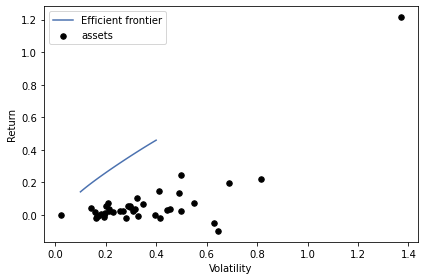

<AxesSubplot:xlabel='Volatility', ylabel='Return'>

In [17]:
risk_range = np.linspace(0.10, 0.40, 100)
plotting.plot_efficient_frontier(ef, ef_param="risk", ef_param_range=risk_range,
                                show_assets=True, showfig=True)

In [27]:
import matplotlib.pyplot as plt

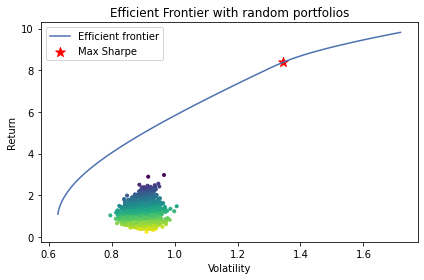

In [37]:
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find the tangency portfolio
ef.max_sharpe()
ret_tangent, std_tangent, _ = ef.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Generate random portfolios
n_samples = 10000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt(np.diag(w @ S @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()

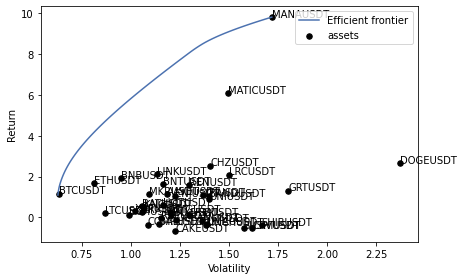

In [40]:
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
for i, txt in enumerate(ef.tickers):
	ax.annotate(txt, ((np.diag(ef.cov_matrix)**(1/2))[i], ef.expected_returns[i]))